In [1]:
ufs_ne = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']

In [4]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [11]:
enade_nordeste = pd.read_csv('ENADE2017/dados/enade2017_computacao_nordeste.csv')
enade_nordeste_filtrado = enade_nordeste.filter(['QE_I08'])
enade_nordeste_filtrado['QE_I08'] = enade_nordeste_filtrado['QE_I08'].astype(str)
enade_nordeste_filtrado = enade_nordeste_filtrado[enade_nordeste_filtrado['QE_I08'] != 'nan'].reset_index().filter(['QE_I08'])
enade_nordeste_filtrado = enade_nordeste_filtrado.rename(columns={'QE_I08': 'RENDA'}, errors='raise')
enade_nordeste_filtrado

,RENDA
0,C
1,C
2,A
3,C
4,E
...,...
1661,B
1662,B
1663,C
1664,D


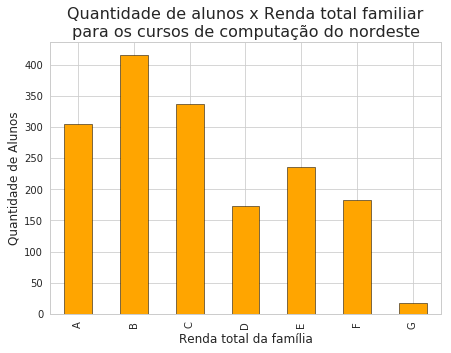

In [60]:
fig, gph = plt.subplots(figsize=(7,5))
gph = enade_nordeste_filtrado['RENDA'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
gph.set_title('Quantidade de alunos x Renda total familiar\npara os cursos de computação do nordeste', fontsize=16)
plt.xlabel('Renda total da família')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [20]:
enade_brasil = pd.read_csv('ENADE2017/dados/enade2017_computacao_brasil.csv')
enade_brasil_filtrado = enade_brasil.filter(['QE_I08', 'UF'])
enade_brasil_filtrado['QE_I08'] = enade_brasil_filtrado['QE_I08'].astype(str)
enade_brasil_filtrado = enade_brasil_filtrado[enade_brasil_filtrado['QE_I08'] != 'nan'].reset_index().filter(['QE_I08', 'UF'])
enade_brasil_filtrado = enade_brasil_filtrado.rename(columns={'QE_I08': 'RENDA'}, errors='raise')
enade_brasil_filtrado

,RENDA,UF
0,E,MT
1,C,MT
2,C,MT
3,B,MT
4,B,MT
...,...,...
8648,B,MG
8649,B,MG
8650,A,MG
8651,C,MG


In [34]:
enade_brasilsemne_filtrado = enade_brasil_filtrado[~enade_brasil_filtrado['UF'].isin(ufs_ne)].filter(['RENDA'])
enade_brasilsemne_filtrado

,RENDA
0,E
1,C
2,C
3,B
4,B
...,...
8648,B
8649,B
8650,A
8651,C


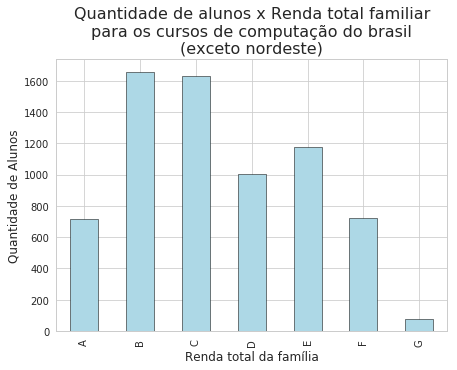

In [63]:
fig, gph = plt.subplots(figsize=(7,5))
gph = enade_brasilsemne_filtrado['RENDA'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
gph.set_title('Quantidade de alunos x Renda total familiar\npara os cursos de computação do brasil\n(exceto nordeste)', fontsize=16)
plt.xlabel('Renda total da família')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [62]:
enade_nordeste_filtrado['RENDA'].value_counts().sort_index()

A    305
B    415
C    337
D    173
E    236
F    183
G     17
Name: RENDA, dtype: int64

In [58]:
enade_brasilsemne_filtrado['RENDA'].value_counts().sort_index()

A     718
B    1655
C    1628
D    1007
E    1176
F     724
G      79
Name: RENDA, dtype: int64

In [55]:
labels=['A', 'B', 'C', 'D', 'E', 'F', 'G']
df = pd.DataFrame({'Nordeste': enade_nordeste_filtrado['RENDA'].value_counts().sort_index().values, 'Brasil (- Nordeste)': enade_brasilsemne_filtrado['RENDA'].value_counts().sort_index().values}, index=labels)
df = (100. * df / df.sum()).round(0)
df

,Brasil (- Nordeste),Nordeste
A,10.0,18.0
B,24.0,25.0
C,23.0,20.0
D,14.0,10.0
E,17.0,14.0
F,10.0,11.0
G,1.0,1.0


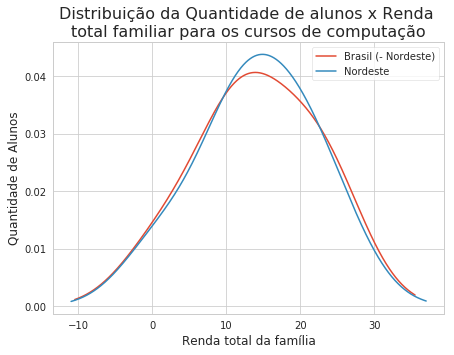

In [79]:
gph = df.plot(kind='density', figsize=(7,5))
gph.set_title('Distribuição da Quantidade de alunos x Renda \ntotal familiar para os cursos de computação', fontsize=16)
plt.xlabel('Renda total da família')
plt.ylabel('Quantidade de Alunos')
plt.show()

In [82]:
ies_nordeste_custo = pd.read_csv('ENADE2017/dados/custo_ies_federais_nordeste.csv')
ies_nordeste_custo

,Instituicao,Sigla,despesaLiquidada,totalAlunos,custoAluno
0,UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),UFPE,1557.9,38774,39754.9
1,UNIVERSIDADE FEDERAL DE ALAGOAS (UFAL),UFAL,802.8,23741,33813.6
2,UNIVERSIDADE FEDERAL DA BAHIA (UFBA),UFBA,1480.0,41445,35709.2
3,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),UFCG,661.4,17194,38468.7
4,UNIVERSIDADE FEDERAL RURAL DE PERNAMBUCO (UFRPE),UFRPE,579.0,13989,41387.5
5,UNIVERSIDADE FEDERAL DO CEARÁ (UFC),UFC,1560.1,32269,48346.1
6,UNIVERSIDADE FEDERAL DO PIAUÍ (UFPI),UFPI,776.2,30348,25575.5
7,UNIVERSIDADE FEDERAL DA PARAÍBA (UFPB),UFPB,1551.5,34084,45518.8
8,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),UFMA,729.5,32204,22652.6
9,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE (U...,UFRN,1694.5,32872,51548.1


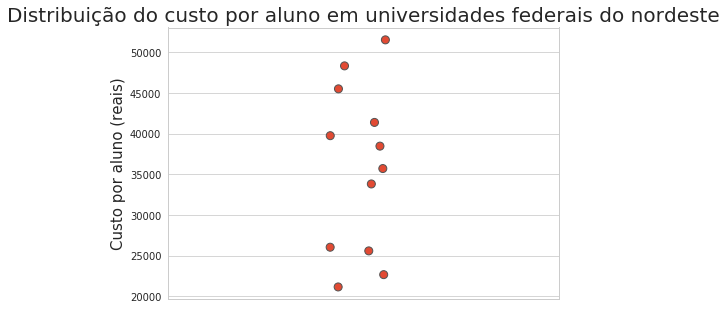

In [88]:
fig, gph = plt.subplots(figsize=(7,5))

gph = sns.stripplot(y='custoAluno', data=ies_nordeste_custo.sort_values(by='custoAluno', ascending=True), s=8, lw=1)

gph.set_title('Distribuição do custo por aluno em universidades federais do nordeste', fontsize=20)

# gph.set_xlabel('Conceito médio do Enade', fontsize=15)

gph.set_ylabel('Custo por aluno (reais)', fontsize=15)

plt.show()

In [97]:
ies_custo = pd.read_csv('./custo_ies_federais_brasil.csv')
ies_custo.head()

,Instituicao,Sigla,despesaLiquidada,totalAlunos,custoAluno
0,UNIVERSIDADE FEDERAL DO ACRE (UFAC),UFAC,286.2,9732,29412.1
1,UNIVERSIDADE FEDERAL DE ALAGOAS (UFAL),UFAL,802.8,23741,33813.6
2,UNIVERSIDADE FEDERAL DO AMAZONAS (UFAM),UFAM,663.5,32203,20603.9
3,UNIVERSIDADE FEDERAL DO AMAPÁ (UNIFAP),UNIFAP,152.7,10796,14148.7
4,UNIVERSIDADE FEDERAL DA BAHIA (UFBA),UFBA,1480.0,41445,35709.2


In [98]:
univ_ne = ies_nordeste_custo['Sigla'].values

In [99]:
ies_custo_brasilsemne = ies_custo[~ies_custo['Sigla'].isin(univ_ne)].reset_index()
ies_custo_brasilsemne.head()

,index,Instituicao,Sigla,despesaLiquidada,totalAlunos,custoAluno
0,0,UNIVERSIDADE FEDERAL DO ACRE (UFAC),UFAC,286.2,9732,29412.1
1,2,UNIVERSIDADE FEDERAL DO AMAZONAS (UFAM),UFAM,663.5,32203,20603.9
2,3,UNIVERSIDADE FEDERAL DO AMAPÁ (UNIFAP),UNIFAP,152.7,10796,14148.7
3,5,UNIVERSIDADE FEDERAL DO OESTE DA BAHIA (UFOB),UFOB,72.5,2740,26453.6
4,6,UNIVERSIDADE FEDERAL DO RECÔNCAVO DA BAHIA (UFRB),UFRB,236.5,10315,22927.3


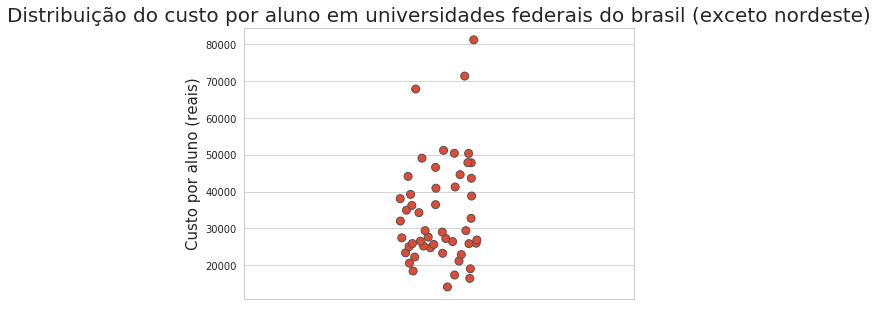

In [103]:
fig, gph = plt.subplots(figsize=(7,5))

gph = sns.stripplot(y='custoAluno', data=ies_custo_brasilsemne.sort_values(by='custoAluno', ascending=True), s=8, lw=1)

gph.set_title('Distribuição do custo por aluno em universidades federais do brasil (exceto nordeste)', fontsize=20)

# gph.set_xlabel('Conceito médio do Enade', fontsize=15)

gph.set_ylabel('Custo por aluno (reais)', fontsize=15)

plt.show()

In [108]:
ies_custo['regiao'] = np.where(ies_custo['Sigla'].isin(univ_ne), 'nordeste', 'brasil (exceto ne)')

In [109]:
ies_custo

,Instituicao,Sigla,despesaLiquidada,totalAlunos,custoAluno,regiao
0,UNIVERSIDADE FEDERAL DO ACRE (UFAC),UFAC,286.2,9732,29412.1,brasil (exceto ne)
1,UNIVERSIDADE FEDERAL DE ALAGOAS (UFAL),UFAL,802.8,23741,33813.6,nordeste
2,UNIVERSIDADE FEDERAL DO AMAZONAS (UFAM),UFAM,663.5,32203,20603.9,brasil (exceto ne)
3,UNIVERSIDADE FEDERAL DO AMAPÁ (UNIFAP),UNIFAP,152.7,10796,14148.7,brasil (exceto ne)
4,UNIVERSIDADE FEDERAL DA BAHIA (UFBA),UFBA,1480.0,41445,35709.2,nordeste
...,...,...,...,...,...,...
58,UNIVERSIDADE FEDERAL DE SERGIPE (UFS),UFS,635.4,30060,21138.2,nordeste
59,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC (UFABC),UFABC,229.4,13203,17377.8,brasil (exceto ne)
60,UNIVERSIDADE FEDERAL DE SÃO CARLOS (UFSCAR),UFSCAR,537.4,16404,32762.6,brasil (exceto ne)
61,UNIVERSIDADE FEDERAL DE SÃO PAULO (UNIFESP),UNIFESP,1199.9,14784,81161.8,brasil (exceto ne)


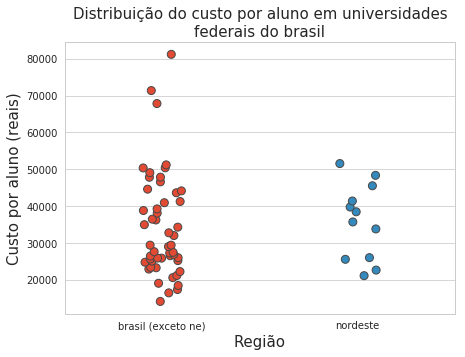

In [114]:
fig, gph = plt.subplots(figsize=(7,5))

gph = sns.stripplot(x='regiao', y='custoAluno', data=ies_custo.sort_values(by='custoAluno', ascending=True), s=8, lw=1)

gph.set_title('Distribuição do custo por aluno em universidades\nfederais do brasil', fontsize=15)

gph.set_xlabel('Região', fontsize=15)

gph.set_ylabel('Custo por aluno (reais)', fontsize=15)

plt.show()